In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
base_dir="/content/drive/MyDrive/GrapeDatasetExtracted/Grape Plant from Plant Village Dataset"
output_dir="/content/drive/MyDrive/plant_split"
categories=["Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___healthy","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)"]
for category in categories:
    os.makedirs(os.path.join(output_dir, f"train/{category}"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, f"test/{category}"), exist_ok=True)

def split_and_copy_files(category_folder):
    category_path = os.path.join(base_dir, category_folder)
    images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

    # Skip if the folder is empty
    if len(images) == 0:
        print(f"Category: {category_folder} is empty. Skipping...")
        return

    # Split the data
    train_files, test_files = train_test_split(images, test_size=0.2, random_state=42)  # 80% training, 20% testing

    # Copy files to respective directories
    train_dir = os.path.join(output_dir, f"train/{category_folder}")
    test_dir = os.path.join(output_dir, f"test/{category_folder}")

    for file_name in train_files:
        shutil.copy(os.path.join(category_path, file_name), os.path.join(train_dir, file_name))

    for file_name in test_files:
        shutil.copy(os.path.join(category_path, file_name), os.path.join(test_dir, file_name))

    print(f"Category: {category_folder}\nTraining: {len(train_files)}\nTesting: {len(test_files)}\n")

# Process each category
for category in categories:
    split_and_copy_files(category)

print("Dataset split and saved successfully.")

Category: Grape___Black_rot
Training: 948
Testing: 237

Category: Grape___Esca_(Black_Measles)
Training: 1109
Testing: 278

Category: Grape___healthy
Training: 339
Testing: 85

Category: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Training: 865
Testing: 217

Dataset split and saved successfully.


In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/GrapeDatasetExtracted/Grape Plant from Plant Village Dataset",
    shuffle=True,
    image_size=(256,256),
    batch_size=32

)

Found 4078 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names
class_names

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [6]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 256, 256, 3)
[1 3 1 2 2 0 0 1 2 2 0 0 1 2 0 1 1 2 2 0 0 0 3 0 2 2 0 1 3 0 1 1]


In [7]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch[0].numpy())

[[[212. 210. 211.]
  [207. 205. 206.]
  [207. 205. 206.]
  ...
  [133. 129. 126.]
  [145. 141. 138.]
  [134. 130. 127.]]

 [[210. 208. 209.]
  [209. 207. 208.]
  [210. 208. 209.]
  ...
  [124. 120. 117.]
  [148. 144. 141.]
  [152. 148. 145.]]

 [[208. 206. 207.]
  [212. 210. 211.]
  [214. 212. 213.]
  ...
  [137. 133. 130.]
  [146. 142. 139.]
  [146. 142. 139.]]

 ...

 [[174. 169. 163.]
  [173. 168. 162.]
  [173. 168. 162.]
  ...
  [143. 134. 129.]
  [140. 131. 126.]
  [135. 126. 121.]]

 [[177. 172. 166.]
  [175. 170. 164.]
  [173. 168. 162.]
  ...
  [141. 132. 127.]
  [139. 130. 125.]
  [140. 131. 126.]]

 [[183. 178. 172.]
  [180. 175. 169.]
  [176. 171. 165.]
  ...
  [135. 126. 121.]
  [134. 125. 120.]
  [139. 130. 125.]]]


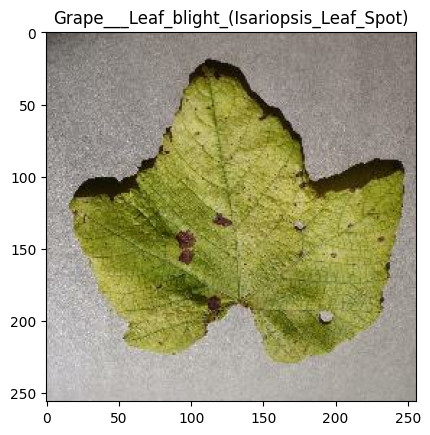

In [8]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])

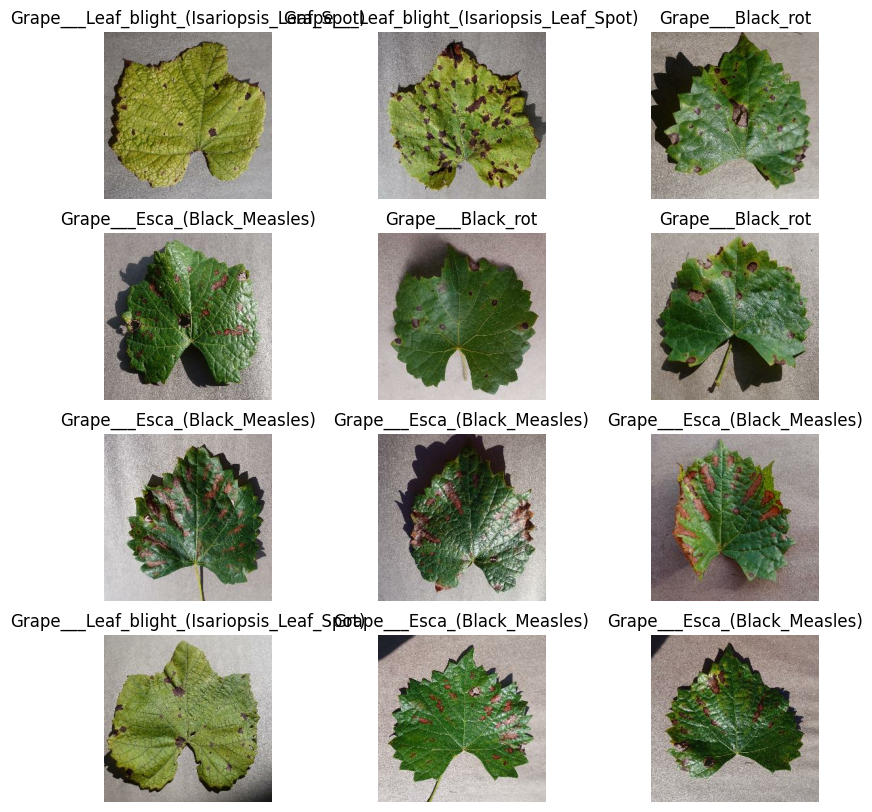

In [9]:
plt.figure(figsize=(10,10)  )
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [10]:
len(dataset)

128

In [11]:
train_size=0.8
len(dataset)*train_size

102.4

In [12]:
train_ds=dataset.take(102)
len(train_ds)

102

In [13]:
test_ds=dataset.skip(102)
len(test_ds)

26

In [14]:
val_size=0.1
len(dataset)*val_size

12.8

In [15]:
val_ds=test_ds.take(12)
len(val_ds)

12

In [16]:
test_ds=test_ds.skip(12)
len(test_ds)

14

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return(train_ds,val_ds,test_ds)

In [18]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [19]:
print("Training dataset size:", len(train_ds))
print("Validation dataset size:", len(val_ds))
print("Test dataset size:", len(test_ds))

Training dataset size: 102
Validation dataset size: 12
Test dataset size: 14


In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, ResNet101
from tensorflow.keras import Model

# Input shape
input_shape = (256, 256, 3)

# Load pre-trained models without the top layer
resnet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape, pooling='avg')
resnet101_base = ResNet101(weights="imagenet", include_top=False, input_shape=input_shape, pooling='avg')

# Freeze base models
resnet50_base.trainable = False
resnet101_base.trainable = False

# Input layer
input_layer = tf.keras.layers.Input(shape=input_shape, name="image_input")

# Extract features from ResNet50 and ResNet101
features_resnet50 = resnet50_base(input_layer)
features_resnet101 = resnet101_base(input_layer)

# Fuse features via direct concatenation
fused_features = tf.keras.layers.Concatenate(name="fused_features")([features_resnet50, features_resnet101])

# Dense classification layer
dense_1 = tf.keras.layers.Dense(256, activation='relu', name="dense_1")(fused_features)
dropout = tf.keras.layers.Dropout(0.5, name="dropout")(dense_1)
output_layer = tf.keras.layers.Dense(4, activation='softmax', name="output")(dropout)

# Define the model
fused_model = Model(inputs=input_layer, outputs=output_layer, name="Fused_Deep_Features_Model")

# Compile the model
fused_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary of the model
fused_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "Fused_Deep_Features_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 2048)           │     23,587,712 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet101 (Functional)    │ (None, 2048)           │     42,658,176 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fused_features            │ (None, 4096)           │              0 │ resnet50[0][0],        │
│ (Concatenate)             │                        │                │ resnet101[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │      1,048,832 │ fused_features[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 4)              │          1,028 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 67,295,748 (256.71 MB)

 Trainable params: 1,049,860 (4.00 MB)

 Non-trainable params: 66,245,888 (252.71 MB)

In [24]:
history=fused_model.fit(train_ds,epochs=50,batch_size=32,verbose=1,validation_data=val_ds)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 104s 609ms/step - accuracy: 0.7437 - loss: 0.9081 - val_accuracy: 0.9740 - val_loss: 0.0712
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 84s 271ms/step - accuracy: 0.9645 - loss: 0.0933 - val_accuracy: 0.9844 - val_loss: 0.0332
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 276ms/step - accuracy: 0.9795 - loss: 0.0627 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.9692 - loss: 0.0800 - val_accuracy: 0.9922 - val_loss: 0.0213
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.9901 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9921 - loss: 0.0276 - val_accuracy: 0.9974 - val_loss: 0.0130
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - accuracy: 0.9885 - loss: 0.0291 - val_accuracy: 0.9870 - val_loss: 0.0331
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.9838 - loss: 

In [47]:
scores=fused_model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 1.0000 - loss: 0.0017


In [40]:
scores

[0.0022374014370143414, 1.0]

In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 102}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

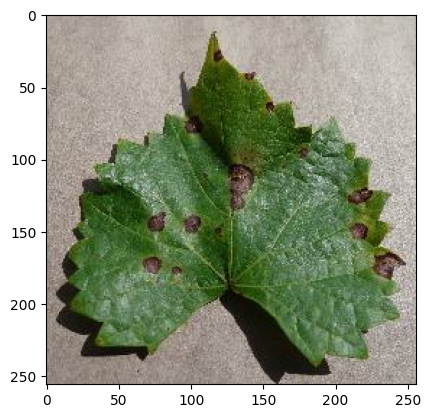

In [45]:
for images_batch, labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))

First image to predict
Actual label: Grape___Black_rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: Grape___Black_rot


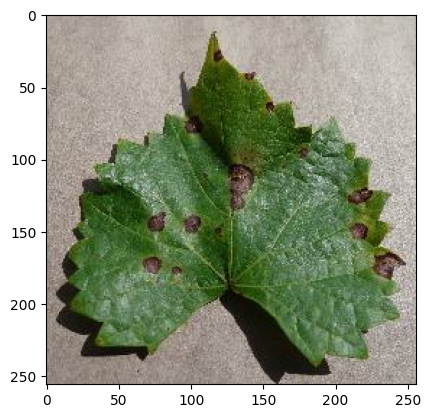

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label:",class_names[first_label])

  batch_prediction=fused_model.predict(images_batch)
  print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [35]:
import numpy as np
def predict(fused_model, img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=fused_model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1045s 1045s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


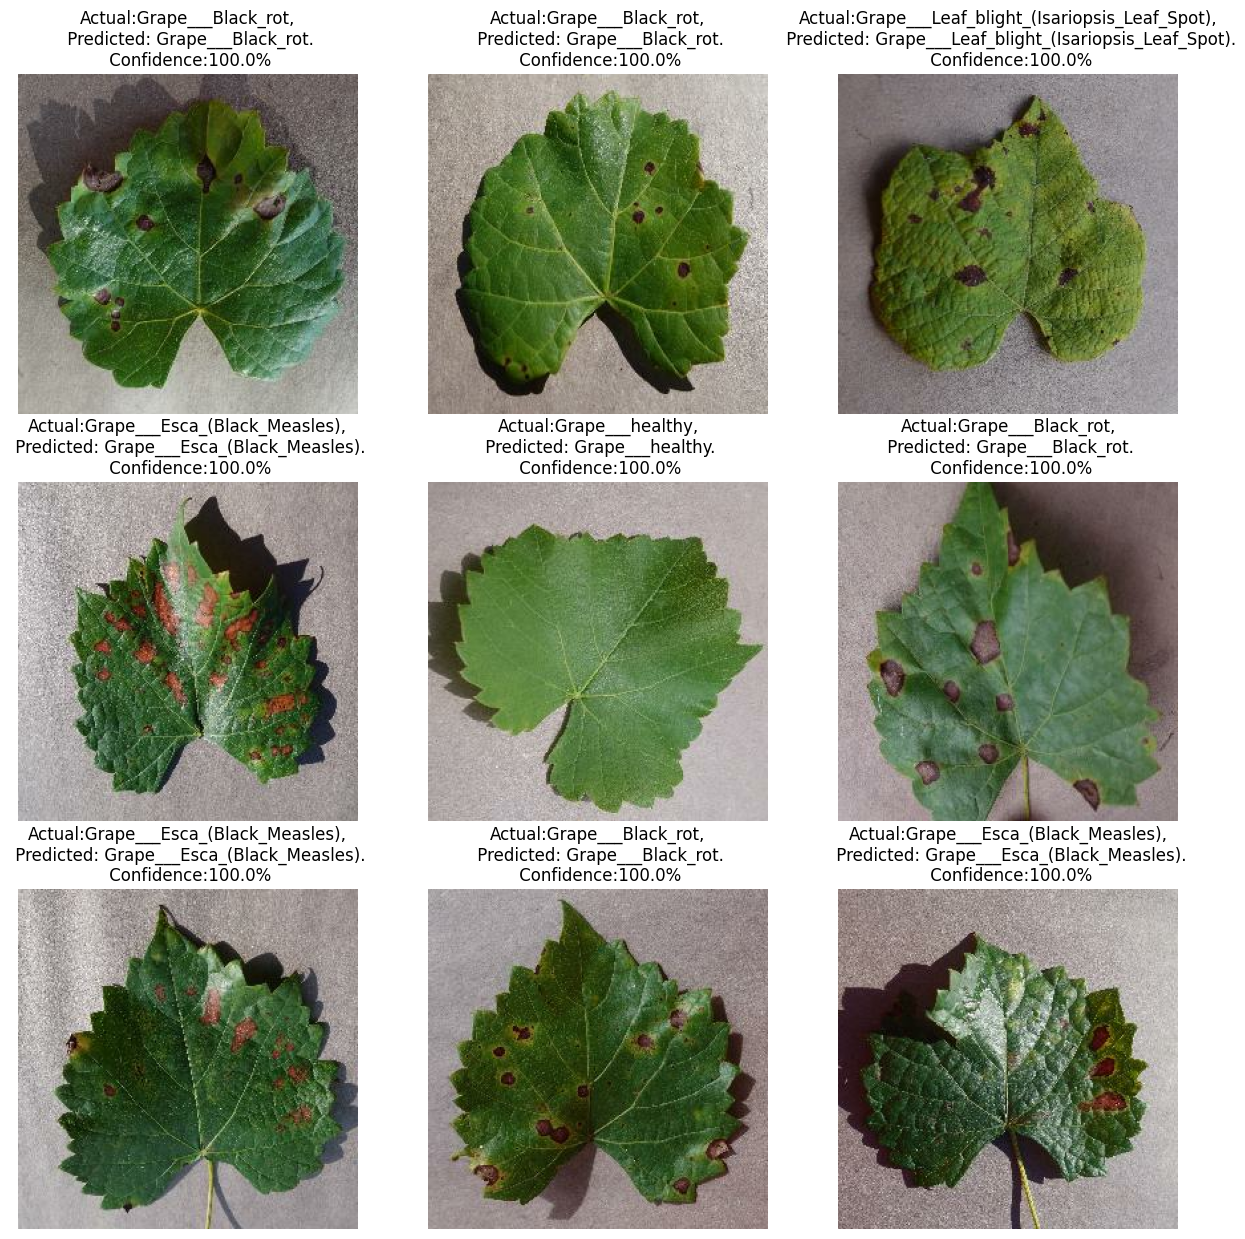

In [36]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(fused_model, images[i].numpy())
    actual_class=class_names[labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}%")

    plt.axis("off")

In [37]:
fused_model.save('/content/drive/MyDrive/fused_model.h5')

In [51]:
fused_model.save('/content/drive/MyDrive/fused_model.keras')